<a href="https://colab.research.google.com/github/ruchithachinthakindi77/LMS/blob/main/AD2(cousine_similarity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Cousine Similarity***


**Example1**

In [ ]:
doc_trump = "Mr.Trump beacame president after winning the political elsection.Though he lost the supoort of some republican frirnds,Trump is friends with President Putin"

doc_election = "President Trump says Putin had no poltical interference is the election outcome.He says it was a withhumt by political parties.He claimed PresidentPutin is a friend who had nothing to do with the election"

doc_putin = "Post elections,Vlamdimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents =[doc_trump,doc_election,doc_putin]

In [ ]:
documents

['Mr.Trump beacame president after winning the political elsection.Though he lost the supoort of some republican frirnds,Trump is friends with President Putin',
 'President Trump says Putin had no poltical interference is the election outcome.He says it was a withhumt by political parties.He claimed PresidentPutin is a friend who had nothing to do with the election',
 'Post elections,Vlamdimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect = CountVectorizer(stop_words='english')

sparse_matrix = count_vect.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df =pd.DataFrame(doc_term_matrix,
                 columns = count_vect.get_feature_names_out(),
                 index = ['doc_trump','doc_election','doc_putin'])
df

,beacame,career,claimed,earlier,election,elections,elsection,friend,friends,frirnds,interference,lost,minister,mr,outcome,parties,political,poltical,post,president,presidentputin,prime,putin,republican,russia,says,served,supoort,trump,vlamdimir,winning,withhumt
doc_trump,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,2,0,0,1,1,0,0,0,1,2,0,1,0
doc_election,0,0,1,0,2,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,2,0,0,1,0,0,1
doc_putin,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,2,0,1,2,0,1,0,1,0,0,1,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df,df))

[[1.         0.30779351 0.37851665]
 [0.30779351 1.         0.26352314]
 [0.37851665 0.26352314 1.        ]]


**Example2**

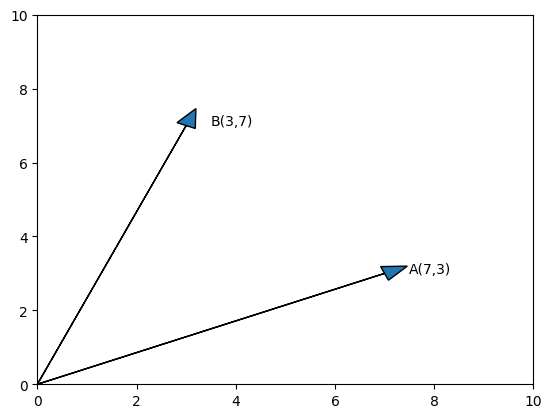

Cosin Similarity between A and B is 0.7241379310344827
Cosine Distence between A and B is 0.27586206896551735


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([7,3])
B =np.array([3,7])

ax = plt.axes()
ax.arrow(0.0,0.0,A[0],A[1],head_width=0.4,head_length=0.5)
plt.annotate(f"A({A[0]},{A[1]})",xy=(A[0],A[1]),xytext=(A[0]+0.5,A[1]))
ax.arrow(0.0,0.0,B[0],B[1],head_width=0.4,head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})",xy=(B[0],B[1]),xytext=(B[0]+0.5,B[1]))
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

cos_sim = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print(f"Cosin Similarity between A and B is {cos_sim}")
print(f"Cosine Distence between A and B is {1-cos_sim}")

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
C = A.intersection(B)
D = A.union(B)
print("AnB = ",C)
print("AUB = ",D)
print("J(A,B)=",float(len(C))/float(len(D)))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B)= 0.25


In [ ]:
def jaccard_similarity(set1,set2):
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  return intersection/union
set_a = {"Language","for","Computer","NLP","Science"}
set_b = {"NLP","for","Language","Data","ML","AI"}

similarity =  jaccard_similarity(set_a,set_b)
print("Jaccard Similarity",similarity)

Jaccard Similarity 0.375


# **Text Similarity: Customer Support Chatbox**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [
    "You can return an item 7 days of purchase.",
    "Our return policy allows youto return items that are unopenend and in their original condition.",
    "We offer free shipping on order over $50."
    "-To track your order,you can visit the'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9AM to 6PM,Monday through Friday."
]

In [ ]:
responses

['You can return an item 7 days of purchase.',
 'Our return policy allows youto return items that are unopenend and in their original condition.',
 "We offer free shipping on order over $50.-To track your order,you can visit the'Order Tracking' page and enter your order number.",
 'Our customer support team is available from 9AM to 6PM,Monday through Friday.']

In [ ]:
user_input = "How can I track my oreder?"


In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')
all_texts = responses + [user_input]


In [ ]:
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]

cosine_similarities = cosine_similarity(user_vector,response_vectors)

In [ ]:
most_similar_idx = np.argmax(cosine_similarities)
responses

['You can return an item 7 days of purchase.',
 'Our return policy allows youto return items that are unopenend and in their original condition.',
 "We offer free shipping on order over $50.-To track your order,you can visit the'Order Tracking' page and enter your order number.",
 'Our customer support team is available from 9AM to 6PM,Monday through Friday.']

In [ ]:
print(f"User Query:{user_input}")
print(f"Most relevant response:{responses[most_similar_idx]}")

User Query:How can I track my oreder?
Most relevant response:We offer free shipping on order over $50.-To track your order,you can visit the'Order Tracking' page and enter your order number.
